In [98]:
#this is to digitize lithologies for better processing. It will be easier to plot them
def str_array2floats(strarray):
    floats=[]
    for s in strarray:
        try:
            floats.append(float(s))
        except:
            floats.append(np.nan)
    return floats


# np.array(lith_labels).shape
def merge_similar_layers(loc_layer,loc_lith_labels):
    res_layer=[]
    res_label=[]
    for a in np.unique(loc_lith_labels):
        single_layer_prop=0
        if a!=-1:
            single_layer_prop=0
            for n,l in zip(loc_lith_labels,loc_layer):
                if a==n:
                    single_layer_prop += l
            res_layer.append(single_layer_prop)
            res_label.append(a)
    return res_layer,res_label

# for processing purpose at all locations, same number of layers and labels prepared. 
def make_same_numb_layers(master_l_thicknesses,lith_labels):
    layersinlocations=[len(l) for l in master_l_thicknesses]
    maxls=max(layersinlocations)
    j=-1
    for ml in master_l_thicknesses:
        j +=1
        if len(ml)<maxls:
            for i in range(maxls-len(ml)):
                ml.append(0)
                lith_labels[j]=np.append(lith_labels[j],-1)
    loc_layers=np.array(master_l_thicknesses)
    return loc_layers,np.array(lith_labels)

#it is thought that if all the locations have layer thickness information according to sorted layers, it will be lot easier to 
#plot or process the information so the function for sorting single location and creating zero thickness layer for missing 
#layer
def get_sortedlayers4loc(mod_loc_layers,mod_loc_layer_lbls,unique_lbls):
    sorted_loc_layer=[]
    for ul in unique_lbls:
        sorted_loc_layer.append(0)
        for e,l in zip(mod_loc_layers,mod_loc_layer_lbls):
            if l==ul:
                sorted_loc_layer[-1]=e
#     sorted_loc_layer[-1]
    return sorted_loc_layer
def get_depths(thickness_layer_array,elevation):
    depths=[]
    d=-elevation   
    for e in thickness_layer_array:
        d += e
        depths.append(d)
    return depths

In [99]:
# Modules and data loading
import numpy as np
import pandas as pd
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import re
import math
from scipy.interpolate import griddata,interp2d
# import mpl_toolkits.mplot3d.art3d.Poly3DCollection
from   mpl_toolkits.mplot3d.art3d import Poly3DCollection
sys.path.append('..')
from pickle_fns import *
base_folder=r'D:\Ameyem Office\Projects\Electric surveys\Easwar files\jalaun\\'
base_folder=r'D:\Ameyem Office\Projects\Electric surveys\Easwar files\Mahoba\\'
vesdf,data_dfs=load_pkl(base_folder+'vesdf_datadf.pkl')
# vesdf,data_dfs=load_pkl('tikamgarh.pkl')
E,N,Ele=vesdf.Easting.values.astype(np.float),vesdf.Northing.values.astype(np.float),str_array2floats(vesdf.RL.values)
# Ele=[float(re.findall('\d*\.\d+|\d+',E)[0]) for E in Ele]
# E,N,data_dfs[0]

In [3]:
# preparation for Mahoba
soil_w_kankar= ['Dry top Soil',  'Dry top soil', 'Dry top soil with kankar',       'Dry top soil with kankars',
               'Loose top soil', 'Top Soil',       'Top dry soil', 'Top silty soil', 'Top soil',
       'Top soil with gravels', 'Top soil with kankar',       'Top soil with kankars',]
high_weath_gr =['Highly Fractured /weathered Granite', 'Highly Weathered Granite',
       'Highly fractured /weathered Granite',]

weather_gran=['Fractured  granite, may be under saturation',
       'Fractured Granite, may be under saturation',
       'Fractured granite, may be under saturation',
       'Fractured/Weathered Granite',
       'Fractured/Weathered Granite, may be under saturation',
       'Fractured/weathered Granite',
       'Fractured/weathered Granite, may be under saturation',
       'Fractured/weathered granite',
       'Fractured/weathered granite ,may be under saturation',
       'Fractured/weathered granite, may be under saturation','Moderately weathered Granite','Slightly weathered Granite',
 'Weathered Granite',
 'Weathered Granite/Gneiss',
 'Weathered granite,',
 'weathered granite'
            ]

hard_gran=['Hard  Granite', 'Hard Granite', 'Hard Granite, massive in nature',
       'Hard granite', 'Hard massive Granite', 'Hard massive granite',
       'Hard rock/granite/Gneiss', 'Hard strong  granite',
       'Hard strong Granite', 'Hard strong granite','Massive strong granite','Strong Granite', 'Strong massive Granite',
          'Moderately Strong Granite',
 'Moderately strong Granite',
 'Moderately strong granite',
 ]
soil_clay=['Clay',
 'Clay ,may be under saturation',
 'Clay may be under saturation',
 'Clay zone, may be under saturation',
 'Clay, may be under saturation',
 'Clay,may be under saturation','clay',       'sandy soil','SiltyClay', 'SiltyClay, may be under saturation', 'Siltyclay',
       'Siltyclay ,may be under saturation', 'Siltyclay to silty sand',
       'Siltyclay to silty sand ,may be under saturation',
       'Siltyclay to siltysand',
       'Siltyclay to siltysand, may be under saturation',
       'Siltyclay, may be under saturation','Silty Clay', 'Silty Clay, may be under saturation',
       'Silty clay ,may be under saturation', 'Silty clay to silty sand',
       'Silty clay to silty sand , may be under saturation',
       'Silty clay to silty sand, may be under saturation',
       'Silty clay under saturation',
       'Silty clay, may be under saturation',
       'Silty clay,may be under saturation','Sandy soil, may be under saturation', ]
silty_sand=['Silty sand','Silty  sand to fine sand',
       'Silty sand to fine sand',
       'Silty sand to fine sand ,may be under saturation',
       'Silty sand to fine sand, may be under saturation',
       'Silty sand, may be under saturation', 'Silty to fine sand','Fine to medium sand',
 'Fine to medium sand , may be under saturation',
 'Fine to medium sand, may be under saturation',]
coarse_sand=[ 'Medium to coarse sand',
       'Medium to coarse sand, may be under saturation',
       'Medium to coarse sand/fractured granite',
       'Medium to coarse sand/fractured granite, may be under saturation','Coarse sand',
 'Coarse sand with gravels',
 'Coarse sand/Fractured/weathered Granite, may be under saturation',
 'Coarse sand/fractured/weathered granite',]

 
 
lith_dict={0:soil_w_kankar,1:soil_clay,2:weather_gran,3:high_weath_gr,4:silty_sand,5:coarse_sand,6:hard_gran,}
lith_dict
all_lith=[]
for j in lith_dict:
    all_lith.extend(lith_dict[j] )
# all_lith
# save_pkl(base_folder+'lith_dict.pkl',lith_dict)

In [4]:
def get_lables(df,lith_dict):
    labels=[]
    for s in df['Interpreted Lithology'].values:
        print(s)
        for i in range(len(lith_dict)):
            if s in lith_dict[i]:
#                 print(lith_dict[i])
                if i in labels and i!=labels[-1]:
                    labels.append(i*10)
                else:
                    labels.append(i)
                break
    return labels
# get_lables(df,lith_dict),df
#utilization of get labels
for df in data_dfs:
    print('a')
    df['lith_label']=get_lables(df,lith_dict)    
lith_labels=np.array(df['lith_label'].values)

a
Top soil
Clay
Weathered Granite/Gneiss
Highly fractured /weathered Granite
Hard Granite
a
Top soil
Siltyclay to silty sand ,may be under saturation
Weathered Granite
a
Top soil with kankars
Siltyclay ,may be under saturation
Silty sand to fine sand ,may be under saturation
Moderately weathered Granite
a
Top soil with kankars
Siltyclay ,may be under saturation
Weathered Granite/Gneiss
a
Top soil with kankars
Clay,may be under saturation
Weathered Granite/Gneiss
a
Top soil with kankars
Siltyclay ,may be under saturation
Weathered Granite/Gneiss
a
Top soil with kankars
Clay
Weathered Granite/Gneiss
Fractured/weathered Granite
Hard Granite, massive in nature
a
Top soil with kankars
Siltyclay ,may be under saturation
Weathered Granite/Gneiss
a
Dry top soil with kankars
Clay, may be under saturation
Hard massive granite
Fractured/Weathered Granite
Hard massive granite
a
Dry top soil with kankars
Silty clay, may be under saturation
weathered granite
a
Dry top soil with kankars
Silty clay, m

In [5]:
df

,Layer No.,Resistivity(Ωm),Thickness(m),Depth (m),Elev.,Interpreted Lithology,lith_label
0,1,26.238,1.4309,1.4309,188.57,Top soil,0
1,2,3.3874,5.1101,6.5410,183.46,"Clay, may be under saturation",1
2,3,808.35,-,-,-,Weathered Granite,2


In [6]:
def get_curveType(df):
    resarray=df['Resistivity(Ωm)'].values.astype(np.float)

    ctype=''
    for i in range(len(resarray)-2):
        ctype +=get_Typeof3(resarray[i:i+3])
    print({ctype:resarray})
    return ctype
        
    
def get_Typeof3(res3):
    if len(res3)!=3:
        print("Array or tuple of 3 elements expected")
    if res3[0]<res3[1]:
        if res3[1]<res3[2]:
            return 'A'
        else:
            return 'K'
    else:
        if res3[1]<res3[2]:
            return 'H'
        else:
            return 'Q'
            
curves  =[]
for df in data_dfs:
    curves.append(get_curveType(df))
#     print(get_curveType(df))
ucurves=np.unique(curves)
ucurves, counts = np.unique(curves, return_counts=True)
ucurves, counts
print (np.asarray((ucurves, counts)).T)
# ucurves,np.bincount(curves),curves

{'HKH': array([  1.85070000e+01,   1.48350000e+00,   5.72270000e+02,
         7.28450000e+01,   9.69170000e+03])}
{'A': array([  10.387,   18.4  ,  290.46 ])}
{'HA': array([  37.995 ,    7.0296,   21.047 ,  681.71  ])}
{'H': array([  17.362,    8.838,  490.99 ])}
{'H': array([  11.991 ,    4.1764,  564.94  ])}
{'H': array([  16.918 ,    5.7451,  572.27  ])}
{'HKH': array([  1.85070000e+01,   1.48350000e+00,   5.72270000e+02,
         7.28450000e+01,   9.69170000e+03])}
{'H': array([  11.09  ,    5.9078,  506.76  ])}
{'HKH': array([  4.39820000e+01,   3.27230000e+00,   3.10030000e+03,
         2.40630000e+02,   6.72020000e+03])}
{'H': array([  92.977,   10.064,  425.14 ])}
{'HA': array([  14.035,   10.148,   28.366,  739.27 ])}
{'H': array([  21.597 ,    4.6473,  801.68  ])}
{'HA': array([  10.334 ,    5.1658,   15.599 ,  321.37  ])}
{'H': array([  27.565,    6.591,  296.77 ])}
{'H': array([  79.644,   10.018,  388.81 ])}
{'H': array([   7.864 ,    4.4629,  335.43  ])}
{'K': array([  15

(array([ 13.,  15.,  15.,   2.,   7.,   5.,   4.,   5.,   2.,   2.,   1.]), array([  5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,
        60.]), <a list of 11 Patch objects>)
(array([ 26.,  13.,  14.,   3.,   4.,   5.,   1.,   1.,   1.,   0.]), array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.]), <a list of 10 Patch objects>)
(array([ 5.,  5.,  7.,  4.,  1.,  4.,  2.,  1.,  1.,  1.,  0.,  1.,  0.,
        1.,  1.,  1.,  2.,  1.,  0.,  0.]), array([   0.,    5.,   10.,   15.,   20.,   25.,   30.,   35.,   40.,
         45.,   50.,   55.,   60.,   65.,   70.,   75.,   80.,   85.,
         90.,   95.,  100.]), <a list of 20 Patch objects>)
(array([ 16.,  16.,   5.,   4.,   2.,   2.,   2.,   3.,   1.,   0.,   2.,
         0.,   0.,   1.,   1.,   2.,   1.,   4.,   6.,   7.]), array([     0.,    500.,   1000.,   1500.,   2000.,   2500.,   3000.,
         3500.,   4000.,   4500.,   5000.,   5500.,   6000.,   6500.,
         7000.,   7500.,   8000.,   8

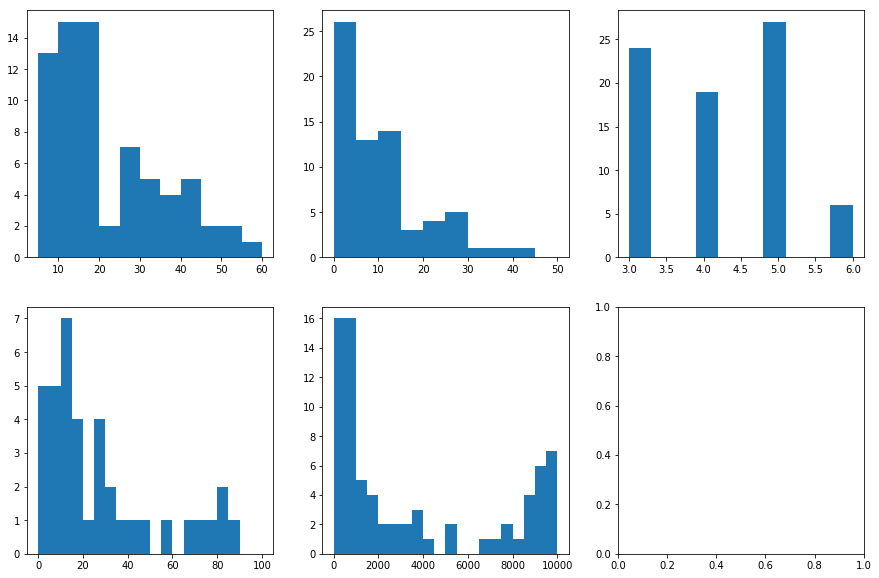

In [57]:
resistivites=[]
thicknesses=[]
for df in data_dfs:
    resarray=df['Resistivity(Ωm)'].values.astype(np.float)
    thickarray=str_array2floats(df['Thickness(m)'].values)
    resistivites.append(resarray)
    thicknesses.append(thickarray)
first_l_r=np.array([r[0] for r in resistivites])
sec_l_r=np.array([r[1] for r in resistivites])
third_l_r=np.array([r[2] for r in resistivites])
last_l_r=np.array([r[-1] for r in resistivites])
n_layers=np.array([len(r) for r in resistivites])
all_r=np.concatenate(resistivites,axis=0)
# all_r

# fig=plt.figure(figsize=(4,4))
fig,((ax1,ax2,ax5),(ax3,ax4,ax6))=plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# n, bins, patches = ax[0].hist(np.random.randn(1000), 50,
#     facecolor='yellow', edgecolor='yellow')
# ax[0].set_xlabel('time (s)')
# # ax[0].hist(first_l_r)


print(ax1.hist(first_l_r,11,(5,60)))
print(ax2.hist(sec_l_r,10,[0,50]))
print(ax3.hist(third_l_r,20,(0,100)))
print(ax4.hist(last_l_r,20,(0,10000)))
print(ax5.hist(n_layers,10))

In [97]:
j=-1
for r,t in zip(resistivites,thicknesses):
    j+=1
    if len(r)==4:
#         print(len(r),len(t))
        print("%2i"%j,end=".  ")
        for i in r:            
            print("%4i"%i,end='|')
        print(" ",end='     |')
        for k in t[:-1]:
            print("%4.1f "%k,end='|')
        print("%4.1f"%sum(t[:-1]),end='|')
            

        print()

 2.    37|   7|  21| 681|      | 0.8 | 5.7 |14.6 |21.0|
10.    14|  10|  28| 739|      | 0.4 | 3.7 |10.2 |14.3|
12.    10|   5|  15| 321|      | 3.5 | 5.8 |21.4 |30.7|
23.    52|  11|  38|3422|      | 1.6 | 1.8 | 0.8 | 4.2|
26.    18|   1| 383|1750|      | 1.3 | 0.8 | 0.7 | 2.8|
27.    23|  11|  19| 932|      | 0.3 | 1.4 | 6.1 | 7.8|
34.    11| 157|   4|7834|      | 3.3 | 1.9 | 2.8 | 8.0|
40.    18|  13|   3|2162|      | 0.7 | 3.0 | 2.4 | 6.1|
41.    41|   4| 253|1892|      | 1.4 | 0.8 |15.4 |17.6|
42.     8|  20|   1|4355|      | 5.0 | 2.4 | 2.0 | 9.4|
44.     9|  28|   4|9426|      | 1.7 | 0.9 | 2.1 | 4.7|
45.    88|  12|   9| 450|      | 0.3 | 3.2 |21.1 |24.5|
47.    27|  12| 638|7487|      | 3.3 | 3.9 | 4.3 |11.5|
53.    16|  60|  14|9159|      | 2.0 | 3.1 | 4.1 | 9.1|
54.    15|   2|1163| 358|      | 0.6 | 0.8 | 8.1 | 9.4|
56.    37|   8|  19| 414|      | 1.0 |12.2 |28.2 |41.4|
59.     7|3924|  26|9627|      | 3.1 |116.8 |53.0 |172.9|
61.   144|  39|  12| 404|      | 0.3 | 2.6 |26

In [79]:
vesdf[['VES No.','Block','Location','Easting','Northing']].to_csv(base_folder+'annex2_locations_exported.csv')

In [95]:
# a=[[2,3],[1,3],[2,4]]

# a.pop(0)
# a
b=[1,2,3]
a=[4]
a.extend(b)
b=a
b

[4, 1, 2, 3]